In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

In [3]:
sms = pd.read_csv('spam.csv')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms = sms[['v1','v2']]
sms.columns = ['class' , 'message']

In [5]:
plt.style.use('ggplot')

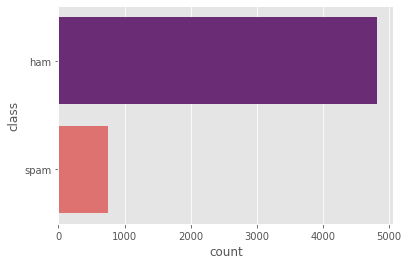

In [6]:
sns.countplot(data=sms , y='class' , palette='magma');

In [7]:
sms['message_len'] = sms['message'].map(len)

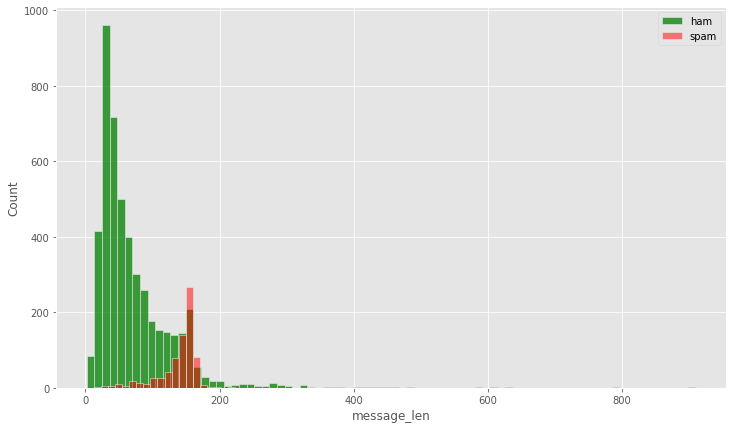

In [8]:
plt.figure(figsize=(12,7))
sns.histplot(data=sms[sms['class'] == 'ham'] ,x='message_len', bins=80 , label='ham' , color='green')
sns.histplot(data=sms[sms['class'] == 'spam'] ,x='message_len', bins=20, label='spam' , color='red' , alpha=0.5)
plt.legend();

In [9]:
stop = stopwords.words('english')

In [10]:
def text_clean(message):
    clean = [c for c in message if c not in string.punctuation]
    clean = ''.join(clean)
    clean = ''.join([word for word in clean if clean.lower().split() not in stop])
    return clean
    

In [11]:
sms['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
text_clean(sms['message'][0])

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [13]:
sms['message_clean'] = sms['message'].map(text_clean)

In [14]:
sms.head()

,class,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...


In [15]:
ham = sms[sms['class'] == 'ham']['message_clean']
spam = sms[sms['class'] == 'spam']['message_clean']

In [16]:
ham[0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [17]:
ham[0].lower().split()

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [18]:
ham_count = ham.map(lambda x : [word.lower() for word in x.split()])
spam_count = spam.map(lambda x : [word.lower() for word in x.split()])

In [19]:
count = Counter()
for i in ham_count:
    count.update(i)
ham_most20 = count.most_common(20)

In [20]:
count = Counter()
for i in spam_count:
    count.update(i)
spam_most20 = count.most_common(20)

In [21]:
ham_most20 = pd.DataFrame(ham_most20 , columns=['text' , 'count'])
spam_most20 = pd.DataFrame(spam_most20 , columns=['text' , 'count'])

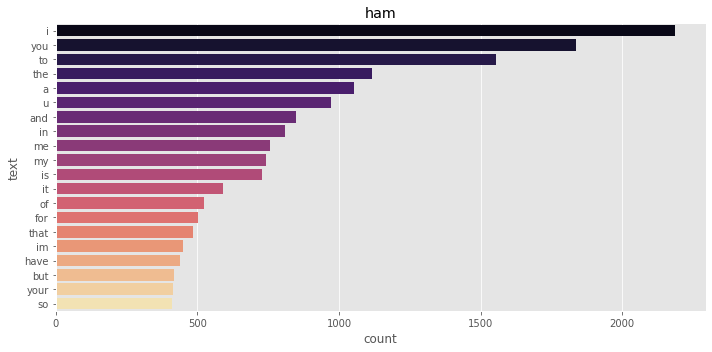

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=ham_most20 , y='text' , x='count' , palette='magma')
plt.title('ham')
plt.tight_layout()

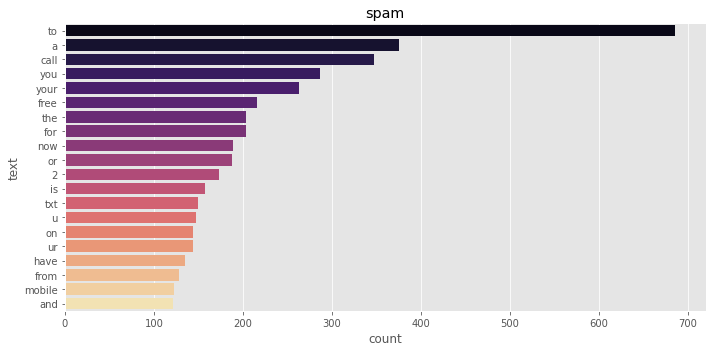

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=spam_most20 , y='text' , x='count', palette='magma')
plt.title('spam')
plt.tight_layout()

# Prediction

In [24]:
features = sms['message_clean']
target = sms['class']

In [25]:
le = LabelEncoder()

In [26]:
target.values[:10]

array(['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
       'spam'], dtype=object)

In [27]:
target = le.fit_transform(target)

In [28]:
target[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

### ham = 0 , spam = 1

In [29]:
x_train , x_test , y_train , y_test  = train_test_split(features , target , test_size=0.2 , 
                                                        shuffle=True , stratify=target , random_state=55)

In [30]:
print(f'Training Set = {x_train.shape[0]}')
print(f'Testing Set = {x_test.shape[0]}')

Training Set = 4457
Testing Set = 1115


In [31]:
tfid = TfidfVectorizer()

In [32]:
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [33]:
x_train

<4457x8349 sparse matrix of type '<class 'numpy.float64'>'
	with 57939 stored elements in Compressed Sparse Row format>

In [34]:
x_test

<1115x8349 sparse matrix of type '<class 'numpy.float64'>'
	with 13300 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(x_train , y_train)

LogisticRegression()

In [37]:
model.score(x_train , y_train)

0.9701592999775633

In [38]:
model.score(x_test , y_test)

0.9650224215246637

In [39]:
y_pred  = model.predict(x_test)

In [40]:
print(classification_report(y_test , y_pred , target_names=['ham' , 'spam']))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [41]:
confusion_matrix(y_test , y_pred)

array([[965,   1],
       [ 38, 111]], dtype=int64)

In [42]:
param = dict(C=np.logspace(-3,3,7) , max_iter=[1000])

In [43]:
model_cv = GridSearchCV(model , param_grid=param , cv = 5)
model_cv.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000]})

In [44]:
print(f'Best Parameter=  {model_cv.best_params_}')

Best Parameter=  {'C': 1000.0, 'max_iter': 1000}


In [45]:
print(f'Best Score = {model_cv.best_score_}')

Best Score = 0.977114946173242


In [46]:
y_pred = model_cv.best_estimator_.predict(x_test)
y_pred_proba = model_cv.best_estimator_.predict_proba(x_test)[:,1]

In [47]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



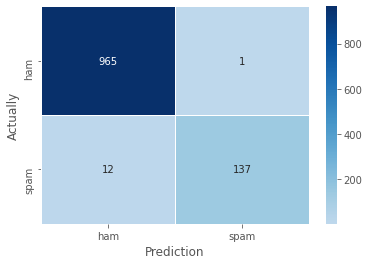

In [48]:
conf_mat = pd.DataFrame(confusion_matrix(y_test , y_pred) , index=['ham' , 'spam'] , columns=['ham' , 'spam'])
sns.heatmap(conf_mat , annot=True ,fmt='.0f' , cmap='Blues' , center=300 , linewidths=1)
plt.xlabel('Prediction')
plt.ylabel('Actually');

In [49]:
tpr , fpr , th = roc_curve(y_test , y_pred_proba)

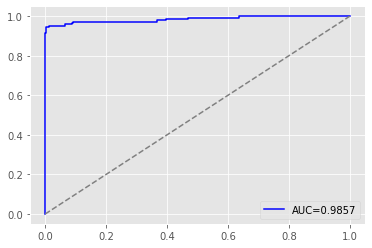

In [50]:
plt.plot(tpr , fpr ,color='blue', label=f'AUC={roc_auc_score(y_test , y_pred_proba).round(4)}')
plt.plot([0,1] , [0,1] , '--' , color='.5')
plt.legend(loc='lower right');

### MultinomialNB

In [51]:
model = MultinomialNB()

In [53]:
model.fit(x_train , y_train)

MultinomialNB()

In [54]:
model.score(x_train , y_train)

0.9672425398249944

In [55]:
model.score(x_test , y_test)

0.9524663677130045

In [56]:
y_pred = model.predict(x_test)

In [57]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.64      0.78       149

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [58]:
confusion_matrix(y_test , y_pred)

array([[966,   0],
       [ 53,  96]], dtype=int64)

In [70]:
param = dict(alpha=np.arange(0,5,0.1) , fit_prior=[True , False])

In [73]:
model_cv = GridSearchCV(model , param_grid=param , cv = 5)
model_cv.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'fit_prior': [True, False]})

In [74]:
print(f'Best Parameter=  {model_cv.best_params_}')

Best Parameter=  {'alpha': 0.2, 'fit_prior': True}


In [75]:
print(f'Best Score = {model_cv.best_score_}')

Best Score = 0.9822739100018621


In [76]:
y_pred = model_cv.best_estimator_.predict(x_test)
y_pred_proba = model_cv.best_estimator_.predict_proba(x_test)[:,1]

In [77]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



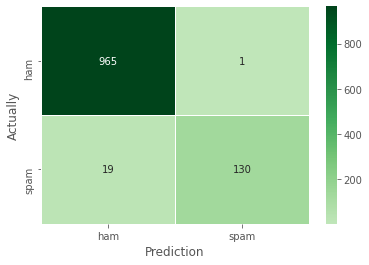

In [81]:
conf_mat = pd.DataFrame(confusion_matrix(y_test , y_pred) , index=['ham' , 'spam'] , columns=['ham' , 'spam'])
sns.heatmap(conf_mat , annot=True ,fmt='.0f' , cmap='Greens' , center=300 , linewidths=1)
plt.xlabel('Prediction')
plt.ylabel('Actually');

In [79]:
tpr , fpr , th = roc_curve(y_test , y_pred_proba)

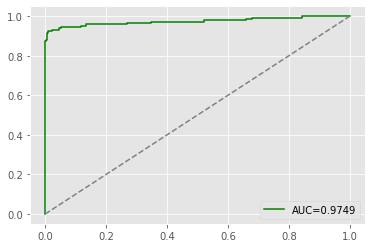

In [82]:
plt.plot(tpr , fpr ,color='green', label=f'AUC={roc_auc_score(y_test , y_pred_proba).round(4)}')
plt.plot([0,1] , [0,1] , '--' , color='.5')
plt.legend(loc='lower right');